In [2]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
ds = xr.open_dataset("with/prog.nc")
ini = xr.open_dataset("with/MOM_IC.nc")

In [5]:
ini

<xarray.Dataset>
Dimensions:          (lath: 3, lonh: 3, latq: 4, lonq: 4, Layer: 10,
                      Interface: 11, Time: 1)
Coordinates:
  * lath             (lath) float64 33.33 100.0 166.7
  * lonh             (lonh) float64 33.33 100.0 166.7
  * latq             (latq) float64 0.0 66.67 133.3 200.0
  * lonq             (lonq) float64 0.0 66.67 133.3 200.0
  * Layer            (Layer) float64 100.0 300.0 500.0 ... 1.7e+03 1.9e+03
  * Interface        (Interface) float64 0.0 200.0 400.0 ... 1.8e+03 2e+03
  * Time             (Time) timedelta64[ns] 00:00:00
Data variables: (12/25)
    Temp             (Time, Layer, lath, lonh) float64 ...
    Salt             (Time, Layer, lath, lonh) float64 ...
    h                (Time, Layer, lath, lonh) float64 ...
    u                (Time, Layer, lath, lonq) float64 ...
    v                (Time, Layer, latq, lonh) float64 ...
    ave_ssh          (Time, lath, lonh) float64 ...
    ...               ...
    diffu            (Time, Layer, lath, lonq) float64 ...
    diffv            (Time, Layer, latq, lonh) float64 ...
    ubtav            (Time, lath, lonq) float64 ...
    vbtav            (Time, latq, lonh) float64 ...
    DTBT             (Time) timedelta64[ns] ...
    eta              (Time, Interface, lath, lonh) float64 ...
Attributes:
    filename:  ./MOM_IC.nc

Initial depths: [   0.  200.  400.  600.  800. 1000. 1200. 1400. 1600. 1800. 2000.]
w_otec= <xarray.DataArray 'e' ()>
array(0.001)
Coordinates:
    zi       float64 0.0


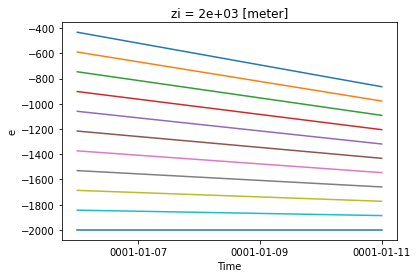

In [11]:
# Graph the depth of each layer over time
print('Initial depths:', ini['Interface'].data)
e = ds['e'].mean(['yh', 'xh'])
for z in ds['zi']:
    e.sel(zi=z).plot()
    
# Reverse engineer the value of w_otec.
print('w_otec=', (e[0,0] - e[1,0])/(5*24*3600))

(2000.0, 0.0)

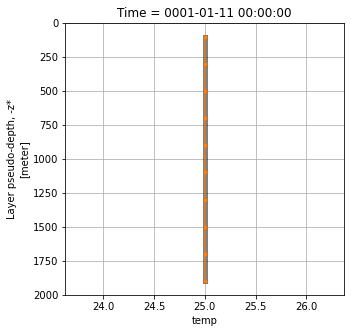

In [10]:
plt.figure(figsize=(5,5))

ini['Temp'].mean(['lath', 'lonh']).plot(y='Layer', color='k', lw=5., alpha=0.5)
for t in ds['Time']:
    ds['temp'].sel(Time=t).mean(['xh', 'yh']).plot(y='zl', marker=".")
plt.grid(True)
plt.ylim(2000, 0)